## 1. Import the necessary libraries

In [88]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import copy

## 2. Read the data as a data frame

In [5]:
df = pd.read_csv("C:/Users/omkar/Downloads/insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3. Perform basic EDA which should include the following and print out your insights at every step.
## a. Shape of the data

In [9]:
df.shape

(1338, 7)

The dataframe has 1338 rows and 7 columns

## b. Data type of each attribute

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The attribute sex, smoker and region is of type object rest all other attributes are of int and float type

## c. Checking the presence of missing values

In [17]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing values present in the dataframe

## d. 5 point summary of numerical attributes

In [19]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Data looks representative of the true age distribution of the population, Very few people have more than 2 kids, Medical charges are highly skewed as most people require basic medication whereas only few suffer from major illnesses

## e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

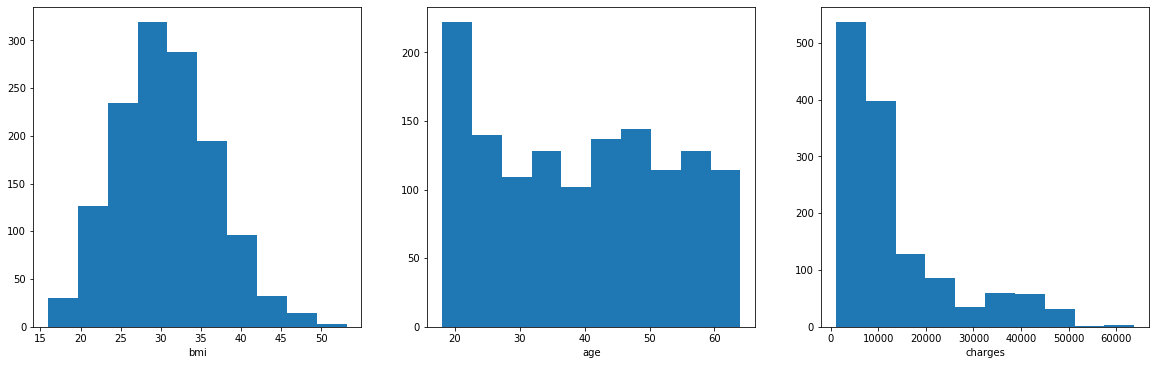

In [62]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
plt.hist(df.bmi)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df.age)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.charges)
plt.xlabel('charges')

plt.show()

Bmi seems normally distributed, Age seems be be uniformly distributed, Charges are highly skewed

## f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [67]:
skewness = pd.DataFrame({'Skewness' : [stats.skew(df.bmi), stats.skew(df.age),stats.skew(df.charges)]}, 
                                index=['bmi','age','charges'])
skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


Skewness of bmi is very less as seen in the previous step, Age is uniformly distributed and there's hardly any skew, Charges are highly skewed

## g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns


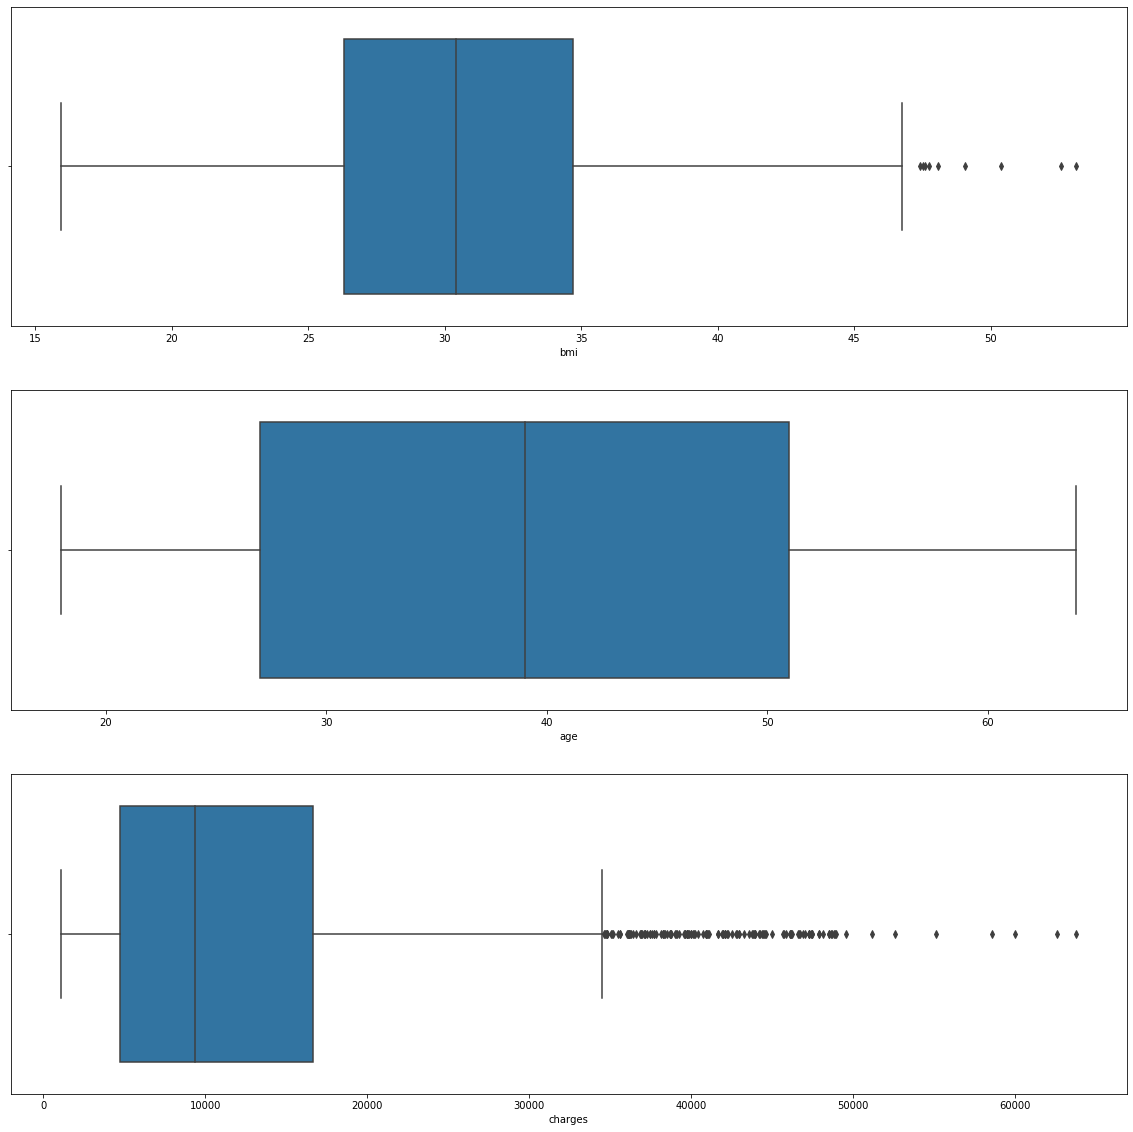

In [70]:
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.boxplot(x=df.bmi)

plt.subplot(3,1,2)
sns.boxplot(x=df.age)

plt.subplot(3,1,3)
sns.boxplot(x=df.charges)

plt.show()

Bmi has a few extreme values, As charges is highly skewed, there are a lot of extreme values

## h. Distribution of categorical columns (include children)

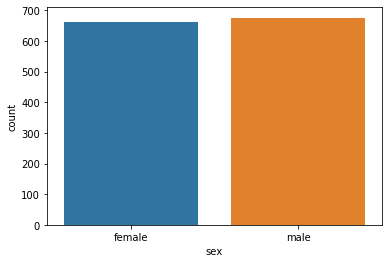

In [79]:
sns.countplot(df['sex'])

The gender ratio of insurance contractor is not significantly different

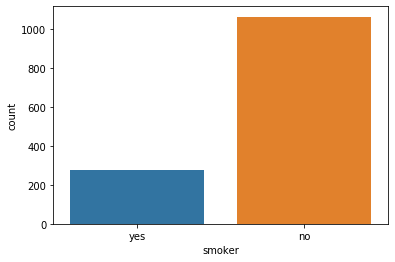

In [81]:
sns.countplot(df['smoker'])

The count of non-smokers is quite high than the smokers in the sample

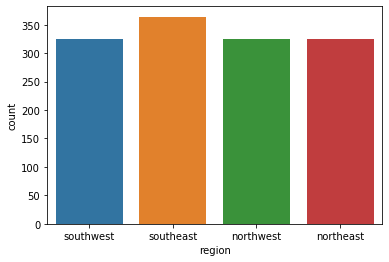

In [83]:
sns.countplot(df['region'])

Instances are distributed evenly accross all regions

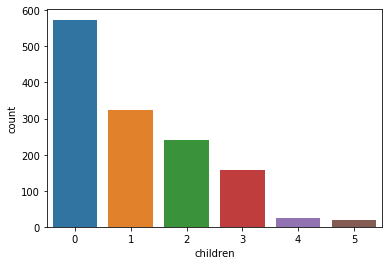

In [85]:
sns.countplot(df['children'])

Many customers are not having children while very few have more than 4 children

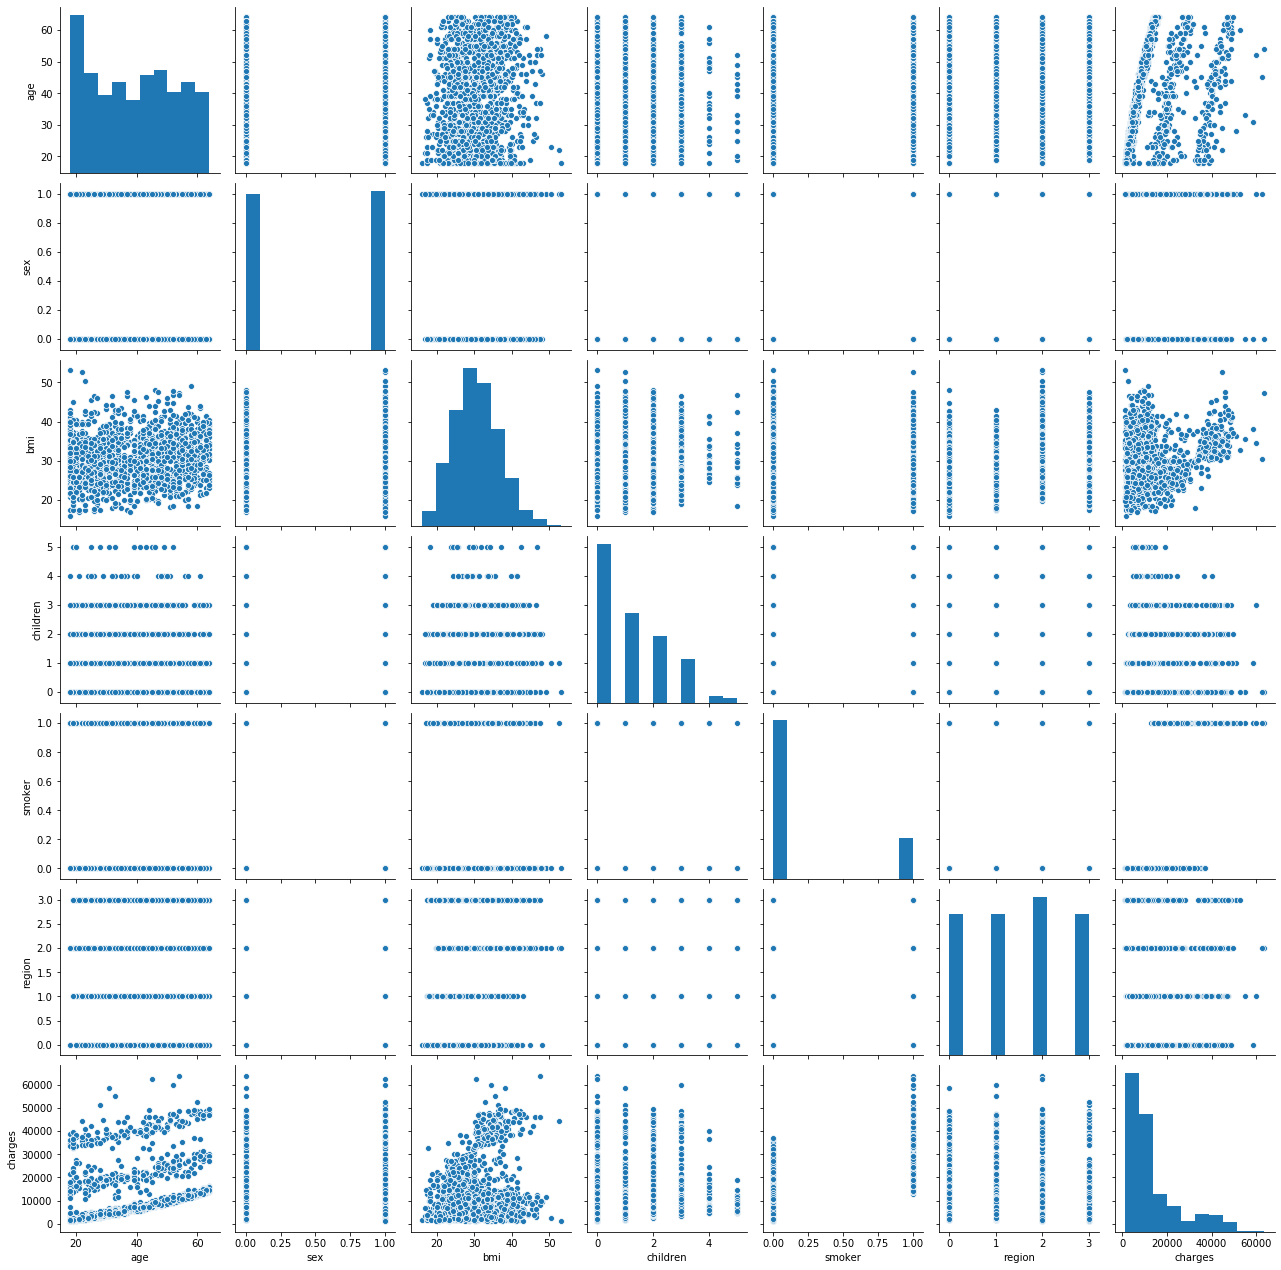

In [89]:
df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['sex', 'smoker', 'region']] = df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 
sns.pairplot(df_encoded)

plt.show()

## 4. Answer the following questions with statistical evidence
## a. Do charges of people who smoke differ significantly from the people who don't?

In [91]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

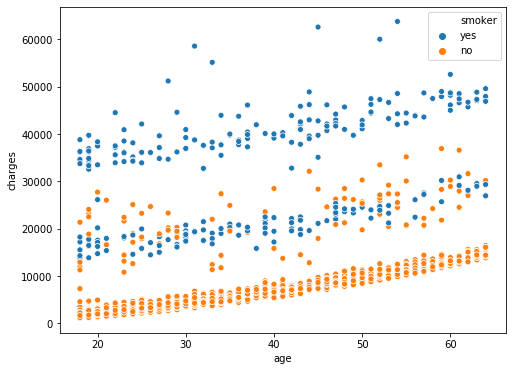

In [117]:
#scatter plot to look for visual evidence of dependency between attributes smoker and charges
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.smoker)

plt.show()

Through visualization we can clearly see that smokers differ significantly from the no-smokers

In [99]:
#Applying T-test to determine the impact of smoking on the charges
x = np.array(df[df.smoker == 'yes'].charges)
y = np.array(df[df.smoker == 'no'].charges)
t, p_value  = stats.ttest_ind(x,y, axis = 0)

print(p_value)

8.271435842177219e-283


Rejecting the null hypothesis as the p value is lesser than 0.05, smokers pay higher charges in comparison to the non-smokers

## b. Does bmi of males differ significantly from that of females?

In [100]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

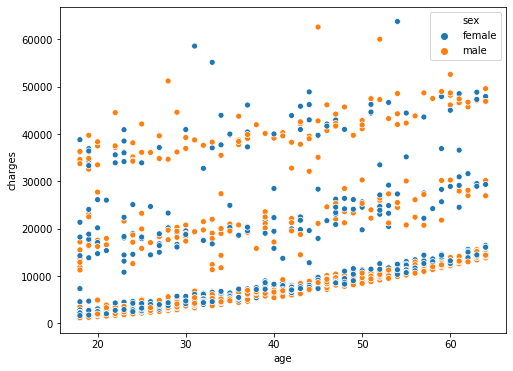

In [111]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.sex)

plt.show()

Through vizualisation here we can't clearly conclude the relation between age and charges

In [113]:
#Performing an Independent t-test
x = np.array(df[df.sex == 'male'].bmi)
y = np.array(df[df.sex == 'female'].bmi)
t, p_value  = stats.ttest_ind(x,y, axis = 0)  

print(p_value)

0.08997637178984932


Accepting null hypothesis as p value is greater than 0.05, Gender has no impact on bmi

## c. Is the proportion of smokers significantly different in different genders?

In [116]:
#performing chi square test to check the proportion of smokers differs as per gender
chisq = pd.crosstab(df['sex'],df['smoker']) 
chi, p_value, dof, expected =  stats.chi2_contingency(chisq)
print(p_value)

0.006548143503580696


Rejecting null hypothesis, smoking habits differs with the gender

## d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [122]:
#applying anova test to check the proportion.
female_df = copy.deepcopy(df[df['sex'] == 'female'])
zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']

f_stat, p_value = stats.f_oneway(zero,one,two)
print(p_value)

0.7158579926754841


Accepting the null hypothesis. Hence,it tells the number of children is not effecting any difference in women bmi